In [285]:
%matplotlib inline
%matplotlib ipympl
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sa
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [286]:
df = pd.read_csv('AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [287]:
df.columns = ['Date','Number_of_Passengers']
df.head()

,Date,Number_of_Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


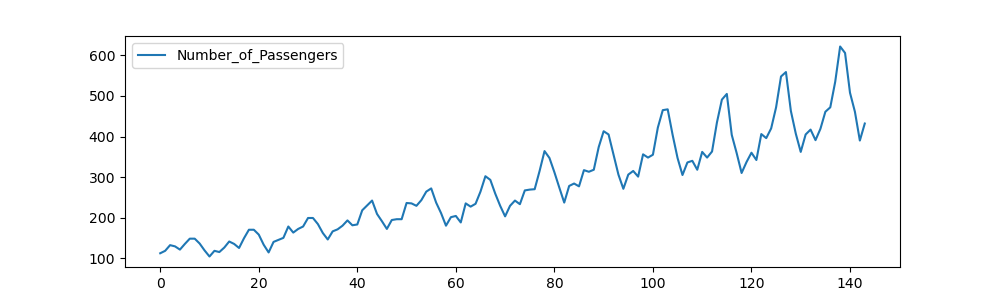

In [288]:
matplotlib.rcParams['figure.figsize'] = [10, 3]
df.plot()
pyplot.show()

Розрахунок автокореляції та часткової автокореляції:

In [289]:
acf_value = acf(df.Number_of_Passengers)
pacf_value = pacf(df.Number_of_Passengers, nlags = 3)

In [290]:
acf_value

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

In [291]:
pacf_value

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955])

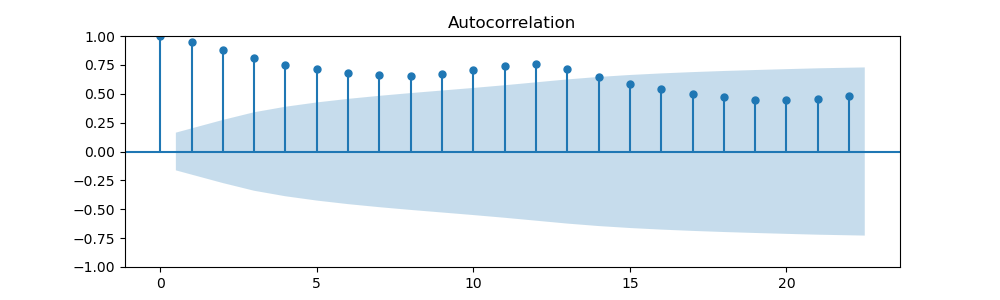

In [292]:
matplotlib.rcParams['figure.figsize'] = [10, 3]
plot_acf(df.Number_of_Passengers)
pyplot.show()

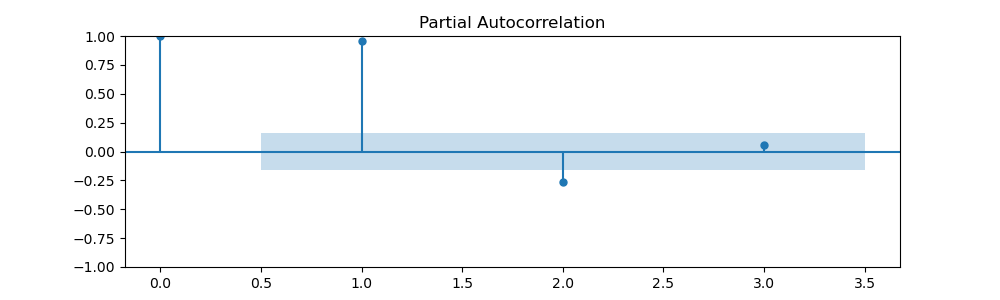

In [293]:
plot_pacf(df.Number_of_Passengers, lags =3)
pyplot.show()

In [294]:
print(df.Number_of_Passengers)

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Number_of_Passengers, Length: 144, dtype: int64


Побудова моделі ARIMA:

In [295]:
src_data_model = df.Number_of_Passengers[:100]
model = sa.tsa.ARIMA(src_data_model).fit()

In [296]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Number_of_Passengers   No. Observations:                  100
Model:                            ARIMA   Log Likelihood                -572.095
Date:                  Mon, 15 May 2023   AIC                           1148.191
Time:                          16:12:58   BIC                           1153.401
Sample:                               0   HQIC                          1150.299
                                  - 100                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        218.3600      8.185     26.677      0.000     202.317     234.403
sigma2      5454.4346    978.833      5.572      0.000    3535.957    7372.912
===================================================================================
Ljung-Box (L1) (Q):                  87.91   Jarque-Bera (JB):                 5.66
Prob(Q):                              0.00   Prob(JB):                         0.06
Heteroskedasticity (H):               1.49   Skew:                             0.53
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Прогноз та візуалізація результату роботи моделі ARIMA:

In [297]:
pred = model.predict(100, 143, typ='levels')

<Axes: >

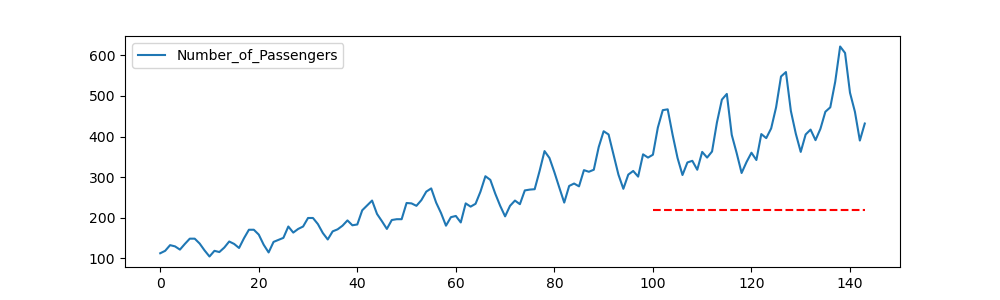

In [298]:
df.plot()
pred.plot(style='r--')

In [299]:
comp = df.Number_of_Passengers[99:143]

Оцінка моделі ARIMA:

In [300]:
metrics.mean_squared_error(comp, pred)

46279.31966461403

In [301]:
metrics.mean_absolute_error(comp, pred)

200.7990955973487

Побудова моделі SARIMAX:

In [302]:
model = sa.tsa.statespace.SARIMAX(src_data_model,seasonal_order=(2,2,2,12)).fit()

Прогноз та візуалізація результату роботи моделі SARIMAX:

In [303]:
pred2 = model.predict(100, 143, typ='levels')

<Axes: >

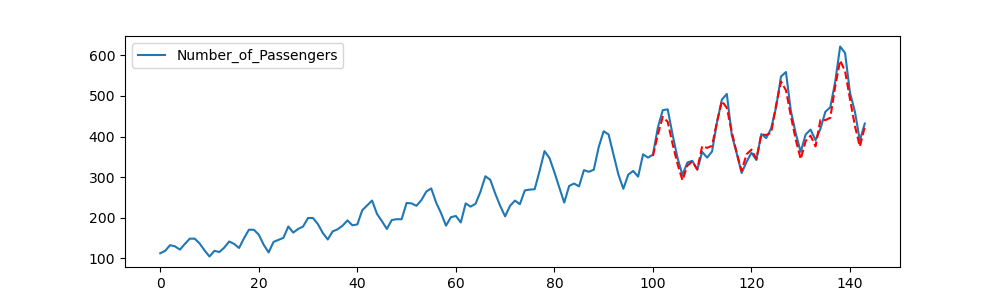

In [304]:
df.plot()
pred2.plot(style='r--')

Оцінка моделі SARIMAX:

In [305]:
metrics.mean_squared_error(comp, pred2)

2858.6499053703383

In [306]:
metrics.mean_absolute_error(comp, pred2)

45.46166249350288